<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Заполнение-пропущенных-значений-и-очистка-от-артефактов" data-toc-modified-id="Заполнение-пропущенных-значений-и-очистка-от-артефактов-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Заполнение пропущенных значений и очистка от артефактов</a></span></li><li><span><a href="#Преобразование-типов" data-toc-modified-id="Преобразование-типов-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Преобразование типов</a></span></li><li><span><a href="#Проверка-наличия-дубликатов" data-toc-modified-id="Проверка-наличия-дубликатов-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Проверка наличия дубликатов</a></span></li></ul></li></ul></li><li><span><a href="#Рассчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Рассчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Рассчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков." data-toc-modified-id="Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков.-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Изучение параметров: площадь, цена, число комнат, высота потолков.</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры." data-toc-modified-id="Изучение-времени-продажи-квартиры.-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры.</a></span></li><li><span><a href="#Влияние-различных-факторов-на-стоимость-квартиры" data-toc-modified-id="Влияние-различных-факторов-на-стоимость-квартиры-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Влияние различных факторов на стоимость квартиры</a></span></li><li><span><a href="#Анализ-населённых-пунктов-с-наибольшим-числом-объявлений." data-toc-modified-id="Анализ-населённых-пунктов-с-наибольшим-числом-объявлений.-4.0.4"><span class="toc-item-num">4.0.4&nbsp;&nbsp;</span>Анализ населённых пунктов с наибольшим числом объявлений.</a></span></li><li><span><a href="#Анализ-квартир-в-Санкт-Петербурге" data-toc-modified-id="Анализ-квартир-в-Санкт-Петербурге-4.0.5"><span class="toc-item-num">4.0.5&nbsp;&nbsp;</span>Анализ квартир в Санкт-Петербурге</a></span></li><li><span><a href="#Анализ-сегмента-квартир-в-центре." data-toc-modified-id="Анализ-сегмента-квартир-в-центре.-4.0.6"><span class="toc-item-num">4.0.6&nbsp;&nbsp;</span>Анализ сегмента квартир в центре.</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## **Изучение данных из файла**

**Импорт библиотек**

In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt_pyp
import numpy as np

from datetime import datetime, timezone
import calendar
import locale
locale.setlocale(locale.LC_ALL, '')
locale._override_localeconv = {'mon_thousands_sep': ' '}
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Загрузка данных**

In [2]:
try:
    db=pd.DataFrame(pd.read_csv('',sep='\\t'))
    
except:
    url='https://drive.google.com/file/d//view?usp=sharing'
    url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
    db = pd.read_csv(url2,sep='\\t')

Проверим датасет на соотвествие типов данных описанию, отсутствие пропусков и дубликатов в категориях.

In [3]:
# Функция для вывода информации о структуре и типах данных датафрейма, проверки на пропуски в столбцах и дубликаты записей

def check_dataset(dataset):
    
    try:
        name =[x for x in globals() if globals()[x] is dataset][0]
        width = 10*len(dataset.columns)
        print('\033[1m','Проверка таблицы: {}'.format(name),'\033[0m')
        print('.'*width)
        print('\033[1m','\nИнформация о типах данных:', '\033[0m')
        display(dataset.info())
        print('.'*width)
        if dataset.isna().mean().sum()==0:
            print('\033[1m', '\nПропусков в столбцах \033[32;1m НЕТ', '\033[0m')
        else:
            print('\033[1m', '\nДоля пропусков в столбцах:', '\033[0m')
            display(pd.DataFrame(round((dataset.isna().mean()*100),2)).style.background_gradient())
        print('.'*width)
        if dataset.duplicated().sum()==0:
            print('\033[1m', '\nДубликатов строк \033[32;1m НЕТ', '\033[0m')
        else:
            print('\033[1m', '\nКоличество дубликатов: \033[31;1m{}\033[0m'.format(dataset.duplicated().sum()))
        print('.'*width)
        print('\033[1m', '\n10 случайных строк датафрейма', '\033[0m')
        display(dataset.sample(10))
           
    except:
        print('Ошибка')

In [4]:
check_dataset(db)

 Проверка таблицы: db 
............................................................................................................................................................................................................................
 
Информация о типах данных: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  

None

............................................................................................................................................................................................................................
 
Доля пропусков в столбцах: 


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.360000
living_area,8.030000
floor,0.000000
is_apartment,88.290000


............................................................................................................................................................................................................................
 
Дубликатов строк  НЕТ 
............................................................................................................................................................................................................................
 
10 случайных строк датафрейма 


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6793,11,4500000.0,36.40,2017-05-17T00:00:00,1,NaN,17.0,18.60,14,False,False,False,8.80,2.0,Санкт-Петербург,43431.0,12188.0,0.0,NaN,0.0,NaN,43.0
4634,14,2700000.0,36.90,2018-01-12T00:00:00,1,2.65,4.0,17.00,1,NaN,False,False,9.00,NaN,посёлок Ильичёво,NaN,NaN,NaN,NaN,NaN,NaN,178.0
10221,5,7000000.0,57.00,2016-05-30T00:00:00,2,2.50,10.0,35.00,3,NaN,False,False,13.00,2.0,Санкт-Петербург,48727.0,16655.0,0.0,NaN,0.0,NaN,594.0
3234,9,6150000.0,37.00,2018-08-08T00:00:00,1,2.65,9.0,18.00,4,NaN,False,False,11.00,NaN,Санкт-Петербург,33085.0,12825.0,1.0,635.0,0.0,NaN,74.0
11172,12,3300000.0,30.00,2016-04-10T00:00:00,1,NaN,9.0,18.00,5,False,False,False,6.00,0.0,Санкт-Петербург,16278.0,15074.0,1.0,373.0,0.0,NaN,134.0
13736,6,14990000.0,203.00,2017-07-03T00:00:00,7,3.66,6.0,132.00,4,NaN,False,False,14.00,NaN,Санкт-Петербург,24102.0,4670.0,1.0,443.0,0.0,NaN,NaN
8402,1,10200000.0,96.00,2017-04-11T00:00:00,4,NaN,6.0,64.00,6,False,False,False,16.00,4.0,Санкт-Петербург,26893.0,7320.0,1.0,276.0,3.0,505.0,90.0
23495,3,5000000.0,53.35,2017-04-09T00:00:00,2,2.75,25.0,29.81,7,NaN,False,False,10.22,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,211.0
8131,9,3600000.0,45.00,2018-09-19T00:00:00,2,2.50,5.0,31.60,2,NaN,False,False,5.10,1.0,Санкт-Петербург,17115.0,16118.0,1.0,615.0,1.0,809.0,36.0
18429,9,7600000.0,96.00,2017-07-24T00:00:00,4,2.60,16.0,69.00,2,NaN,False,False,15.00,2.0,Санкт-Петербург,34497.0,14798.0,0.0,NaN,1.0,750.0,45.0




---


Проверяем количество и распределение пропущенных записей в полях, заполненных пользователями

In [5]:
user_columns = db.columns[0:15].append(db.columns[21:22])
print(db[user_columns].isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
days_exposition          3181
dtype: int64


#### Вывод

Данные представляют собой 23699 записей состоящих из 22 полей. Некоторые поля имеют неоптимальный или неверный тип данных.
Данные, предоставленные пользователями, отностительно ключевых характеристик объектов полны и, на первый взгляд, не имеют симметричных пропусков. Предварительно, некоторые пропуски могут быть заполнены вычисленными данными на основании значений других полей.



---


Проверяем количество и распределение пропущенных записей в полях, заполненных автоматически на основе картографических данных.

In [6]:
ya_columns = db.columns[15:21]
print(db[ya_columns].isna().sum())

airports_nearest        5542
cityCenters_nearest     5519
parks_around3000        5518
parks_nearest          15620
ponds_around3000        5518
ponds_nearest          14589
dtype: int64


#### Вывод

Значения полей, заполненных автоматически на основе картографических данных, содержат сравнительно много пропусков. Это, вероятно, является недостатком или сбоем в работе примененного алгоритма заполнения. Так, например, при наличии в 3х километровой зоне парков и водоемов, расстояние до ближайшего не определено для 9000-10000 записей.

## **Предобработка данных**

#### Заполнение пропущенных значений и очистка от артефактов

**1)** Колонка "число комнат" не содержит пропущенных значений, однако имеет 197 записей с нулевым количеством комнат. Эти данные можно в достаточной долей достоверности частично восстановить по значениям общей площади для указанных записей. Так как коэффициент корреляции этих значений довольно высок (75,8%).

In [7]:
print(db['rooms'].corr(db['total_area']))

0.7583438234725666


Получим распределение общей площади в записях с нулевыми значениями количества комнат. 

count    197.000000
mean      29.279746
std       25.855264
min       15.500000
25%       24.050000
50%       26.050000
75%       28.400000
max      371.000000
Name: total_area, dtype: float64


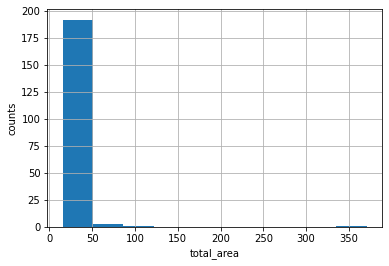

In [8]:
print(db[db['rooms']==0]['total_area'].describe())
zero_rooms_hist=db[db['rooms']==0]['total_area'].hist();
plt_pyp.xlabel("total_area")
plt_pyp.ylabel("counts");

Не менее 75% записей имеют значение общей площади не выше 28,5 кв.м. Получим медианные значения общей площади в зависимости от количества комнат по исходным данным.

In [9]:
total_from_rooms = db.pivot_table(index="rooms",values='total_area',aggfunc='median')
print(total_from_rooms)

       total_area
rooms            
0           26.05
1           36.56
2           53.00
3           73.00
4           99.30
5          146.45
6          184.30
7          214.00
8          235.70
9          300.95
10         272.60
11         188.90
12         900.00
14         304.20
15         590.00
16         270.00
19         374.60


In [10]:
print('Из общего количества ({} записей) с пропущенными значениями количества комнат, {} - объявления о продаже студий.'.format(db.query('rooms==0')['total_area'].count(),db.query('rooms==0 and studio==True')['total_area'].count()))

Из общего количества (197 записей) с пропущенными значениями количества комнат, 138 - объявления о продаже студий.


Можно уверенно утверждать, что бОльшая часть записей с нулевыми данными о количестве комнат относится к однокомнатным квартирам. 

In [11]:
print('Количество однокомнатных квартир в записях с нулевым количеством комнат: {} или {:.1%}'.format(db.query("rooms==0 and total_area<=36.56").shape[0],db.query("rooms==0 and total_area<=36.56").shape[0]/db[db["rooms"]==0]["total_area"].shape[0]))

Количество однокомнатных квартир в записях с нулевым количеством комнат: 187 или 94.9%


Произведем замену для записей удовлетворяющих условию "количество комнат" = 0 и "общая площадь" <= 36.56 кв.м.

In [12]:
for ind in db.query("rooms==0 and total_area<=36.56").index:
    db.loc[ind,'rooms']=1

**2)** В столбце "высота потолков (м)" пропущены данные в 9195 записях. Информация о высоте потолков зависит от множества факторов, не нашедших отражения в исходных данных. Так, помимо этажности, высота потолков зависист от типа и архитектурных особенностей постройки, года возведения, условий последующей эксплуатации и т.д. Исходя из этого, замена пропусков усредненными значениями (например по локации) будет являться произвольной и исказит исследование.

Произведем замену пропущенных значений по полю "высота потолков (м)" на (-1) - маркер отсутствуюего значения.

In [13]:
db['ceiling_height'].fillna(int(-1),inplace=True)

Проверим значения столбца "высота потолков (м)" на наличие артефактов. Исходя из характера данных (информации о жилых помещениях) будем считать критерием "нормальных" данных высоту не менее 2м и не более 8м (например, в дуплексе или лофте). В наших данных планку отсечения поднимем до 10.3м, так как оно на 2м больше предыдущего и уже на 3,7м меньше последующего значений в упорядоченном ряду. 

In [14]:
print(db.query('ceiling_height >0 and (ceiling_height < 2.0 or ceiling_height > 10.3)')['ceiling_height'].value_counts())

27.00     8
25.00     7
32.00     2
22.60     1
100.00    1
1.20      1
1.00      1
27.50     1
20.00     1
1.75      1
14.00     1
26.00     1
24.00     1
Name: ceiling_height, dtype: int64


Имеем 27 записей о недвижимости, значения высоты потолков в которых не соотвествуют типичным для жилых помещений. Скорее всего, эти значения являются ошибками фиксации, случайными (27м вместо 2,7м) или намеренными (1м и 100м).

Произведем замену артефактных значений по полю "высота потолков (м)" на (-1) - маркер отсутствуюего значения.

In [15]:
to_replace=db.query('ceiling_height >0 and (ceiling_height < 2.0 or ceiling_height > 10.3)')['ceiling_height'].tolist()
db['ceiling_height']=db['ceiling_height'].replace(to_replace,int(-1))

**3)** У 86 записей в поле "всего этажей в доме" пропущены значения. Без ущерба для достоверности анализа  пропуски могут быть заполнены значениями из списка этажностей домов в исследовании выше или равных этажу в записи (хотя, так как в представленных данных значения этажности дома представлены непрерывным рядом [1:33], можно было бы произвести замену способом "всего этажей в доме" = "этаж").

In [16]:
number_of_floors=list(pd.Series(db['floor'].unique()).sort_values())
for ind in db[db['floors_total'].isna()==True].index:
    db.loc[ind,'floors_total']=min(i for i in number_of_floors if i >=db.loc[ind,'floor'])

Так как количество таких записей составляет 0,36%, эти замены (хотя и добавят значений в категорию "последний этаж") не окажут существенного влияния на анализ зависимости цены от типа этажа (первый, последний, другой). 

**4)** Данный о "жилой площади" не заполнены у 1903 записей. Причиой может являться отсутствие сведений у пользователя на момент заполнения (не указано в документах, перепланировка, забыл). Размер жилой площади в исходных данных находится в сильной взаимосвязи с количеством комнат (корреляция 85,78%). На основании значений этого столбца эти пропуски могут быть заменены медианными значениями для соотвествующего количества комнат (поле "жилая площадь" не будет использовано в последующем анализе).

In [17]:
print(db['living_area'].corr(db['rooms']))

0.8496043952432574


Получим медианные значения жилой площади в зависимости от количества комнат по исходным данным и произведем заполнение пропусков.

In [18]:
living_to_rooms = db.pivot_table(index="rooms",values='living_area',aggfunc='median')
for ind in db[db['living_area'].isna()==True].index:
    db.loc[ind,'living_area']=living_to_rooms.loc[db.loc[ind,'rooms'],'living_area']

**5)** В поле "апартаменты" 20924 пропущеных значений или 88,3%. Из заполненных записей апартаментами являются только 50 (или 1,8% от заполненных). В соответствии с опубликованным <a ref='https://www.bsn.ru/articles/liveestate/17213_reyting_apartamentov_sanktpeterburga/#:~:text=Доля%20апартаментов%20в%20центральных%20районах,из%20центра%20в%20спальные%20районы'>исследованием</a>, в Санкт-Петербурге доля апартаментов во вводимом квартирном фонде с 2016 года составляла от 2% до 27% (в зависимости от района). Резонно предположить, что в представленных данных вторичного рынка (2014-2019гг) доля апартаментов не может быть ниже 2%, а значит пропущенные значения не являются False по умолчанию. Однако, с удовлетворяющей степенью достоверности заполнить пропуски дифференцированными значениями не представляется возможным ввиду отсутствия корреляции с другими характеристиками объекта (любое жилое помещение может быть переведено собственником в категорию апартаментов). Cчитаем уместным заполнить отсуствующие значения False и не использовать данные о признаке аппартаментов в дальнейшем анализе.

In [19]:
print(db['is_apartment'].value_counts())
db['is_apartment'].fillna(False,inplace=True)

False    2725
True       50
Name: is_apartment, dtype: int64


**6)** "Площадь кухни" не заполнена у 2278 записей. Причины пропусков, скорее всего, аналогичны пропускам в данных о жилой площади. Площадь кухни в основном зависит только от индивидуальных особенностей объекта (проект, наличие перепланировок) и слабо коррелирует с имеющимися данными. Максимальную зависимость площадь кухни демонстрирует только по отношению к общей площади. Однако значение коэффициента корреляции (60,91%) не позволяет использовать эту зависимость для формирования заполняющих значений.

In [20]:
print(db['kitchen_area'].corr(db['total_area']))

0.6091211711198318


Произведем замену пропущенных значений по полю "площаадь кухни" на (-1) - маркер отсутствуюего значения.

In [21]:
db['kitchen_area'].fillna(int(-1),inplace=True)

**7)** По полю "число балконов" пропущены значения в 11519 записях. С большой долей вероятности можно считать, что пропуски являются аналогом значения 0 для пользователя при заполнении данных (это данные о недвижимости, которые пользователь точно знает и помнит, в отличие от размера жилой площади и площади кухни, например, и их нет резона скрывать). Произведем замену пропущенных значений по колонке "число балконов" на значение 0.

In [22]:
db['balcony'].fillna(0,inplace=True)

**8)** Название населённого пункта пропущено в 49 записях. Эти пропуски скорее всего являются ошибкой формирования данных и не могут быть восстановлены на основании значений других полей (данные яндекса дают линейное растояние до объекта от фиксированных точек и не позволяют произвести полноценную триангуляцию).

In [23]:
db[db['locality_name'].isna()==True].isna().sum()

total_images             0
last_price               0
total_area               0
first_day_exposition     0
rooms                    0
ceiling_height           0
floors_total             0
living_area              0
floor                    0
is_apartment             0
studio                   0
open_plan                0
kitchen_area             0
balcony                  0
locality_name           49
airports_nearest         8
cityCenters_nearest      8
parks_around3000         8
parks_nearest           34
ponds_around3000         8
ponds_nearest           24
days_exposition          1
dtype: int64

Так как данные записи могут быть использованы для анализа иных взаимосвязей помимо локации, произведем заполнение пропусков значением "не указано".

In [24]:
db['locality_name'].fillna('не указано',inplace=True)

Большое количество пропусков в поле "сколько дней было размещено объявление (от публикации до снятия)" (3181) может иметь разнообразные причины. Например, что квартира была продана в день публикации, что объявление было активно на момент формирования данных, что пользователь забыл снять объявление с публикации и т.п. Статистика данных по этому полю и значение самой ранней и самой поздней даты публикации объявлений с пропущенными значениями не дают однозначного ответа о характере пропусков.   

In [25]:
print(db['days_exposition'].describe())
print('Самое ранне объявление, с пропуском:',db[db['days_exposition'].isna()]['first_day_exposition'].min())
print('Самое позднее объявление, с пропуском:',db[db['days_exposition'].isna()]['first_day_exposition'].max())
print('Самое позднее объявление в данных:',db['first_day_exposition'].max())

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64
Самое ранне объявление, с пропуском: 2014-11-27T00:00:00
Самое позднее объявление, с пропуском: 2019-05-03T00:00:00
Самое позднее объявление в данных: 2019-05-03T00:00:00


Соотвественно, пропуски в данном поле не могут быть заполнены значениями на основе разности "дата формирования данных" или "дата самого последнего объявления в данных" и "дата публикации", так как это приведет к искажению данных исследоввания.

Произведем замену пропущенных значений по полю "сколько дней было размещено объявление (от публикации до снятия)" на (-1) - маркер отсутствуюего значения.

In [26]:
db['days_exposition'].fillna(int(-1),inplace=True)

Пропущенные данные в полях, являющихся результатом автоматического заполнения на основе картографических данных не могут быть восстановлены, так как сформированы на основе индивидуальных координат расположения объектов. Полагаем разумным заполнить эти пропуски маркером отсутствующих значений (-1).

In [27]:
for ind in ya_columns:
    db[ind].fillna(int(-1),inplace=True)

#### Преобразование типов

В исходных данных некоторые столбцы имеют не оптимальный тип. Произведем преобразование полей, содержащих данные о количестве объектов и расстояниях, кратных метру, к целочисленному типу.

In [28]:
filds_list=['floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
db.loc[:,filds_list]=db.loc[:,filds_list].apply(pd.to_numeric,errors='coerce',downcast='integer')

Логическое поле, определяющее является ли объект апартаментами, имеет ошибочный тип дпнных. Произведем преобразование.

In [29]:
db['is_apartment'] = db['is_apartment'].astype('bool')

#### Проверка наличия дубликатов

Проверим данные на наличие дублированных записей.

In [30]:
print('Количество дубликатов: ',db.duplicated().sum())

Количество дубликатов:  0


Обработка строк в колонке 'locality_name'. В данных о местопложении объектов параллельно используются типы населенных пунктов содержащие "ё" и "е" в наименованиях ("посёлок" и "поселок"). Приведем к однозначному наименовнию типов населенных пунктов.

In [31]:
db['locality_name'].unique().shape[0]

365

In [32]:
db['locality_name']=db['locality_name'].str.replace('ё','е')

In [33]:
db['locality_name'].unique().shape[0]

331

## **Рассчёты и добавление результатов в таблицу**

Добавляем столбец, содержащий расчетные данные: цену квадратного метра площади объекта.

In [34]:
db['price_per_sqmeter']=db['last_price']/db['total_area']

Добавляем столбцы: день недели, месяц и год публикации объявления.

In [35]:
db['first_day_exposition']=pd.to_datetime(db['first_day_exposition'])
db['weekday_published']=pd.DatetimeIndex(db['first_day_exposition']).day_name()
db['month_published'] = pd.DatetimeIndex(db['first_day_exposition']).month
db['month_published'] = db['month_published'].apply(lambda x: calendar.month_abbr[x])
db['year_published'] = pd.DatetimeIndex(db['first_day_exposition']).year

Добавляем столбец типа этажа объекта (первый, последний, другой).

In [36]:
db['floor_type']=np.where(db['floor']==1, 'first',np.where(db['floor']==db['floors_total'], 'last', 'other'))

Добавляем столбец, содержащий расчетные данные: соотношение жилой и общей площади.

In [37]:
db['living_to_total']=db['living_area']/db['total_area']

Добавляем столбец, содержащий расчетные данные: отношение площади кухни к общей площади. Для строк, площадь кухни которых не известна (-1), устанавливаем значение также (-1).

In [38]:
db['kitchen_to_total']=np.where(db['kitchen_area']>0, db['kitchen_area']/db['total_area'], int(-1))

## **Исследовательский анализ данных**

#### Изучение параметров: площадь, цена, число комнат, высота потолков.

**1)** Изучим распределение данных об общей площади объектов недвижимости в исследовании.

In [39]:
total_area_analisis=pd.DataFrame(db['total_area'].describe().apply(lambda x: format(x, '.1f')))
print(total_area_analisis)

      total_area
count    23699.0
mean        60.3
std         35.7
min         12.0
25%         40.0
50%         52.0
75%         69.9
max        900.0


Показатели описательной статистики свидетельствуют:
- о смещении плотности распределения данных об общей площади вправо (максимальное значение превосходит границу 75%го интервала в 13 раз);
- о сравнительно плотном распределении и наличии небольшого количества выбросов, нетипичных данных (стандартное отклонение составляет около половины величины среднего значения, размах "первый-третий квартили" составляет половину среднего значения).

In [40]:
print(db['total_area'].value_counts(bins=10,sort=False))

(11.111, 100.8]    21895
(100.8, 189.6]      1539
(189.6, 278.4]       180
(278.4, 367.2]        51
(367.2, 456.0]        18
(456.0, 544.8]        11
(544.8, 633.6]         4
(633.6, 722.4]         0
(722.4, 811.2]         0
(811.2, 900.0]         1
Name: total_area, dtype: int64


Исключим очевидно нетипичное значение в диапазоне 811,2-900 кв.м. и построим гистограмму частот.

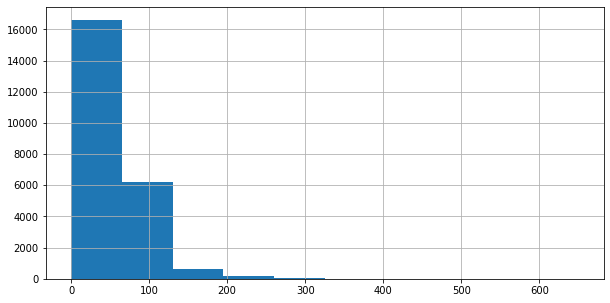

In [41]:
db['total_area'].hist(figsize=(10,5),range=(0,650));

98.88% значений общей площади расположены в диапазоне 11.111-189.6кв.м. Построим гистограмму по этому диапазону, чтобы определить тип распределения.

Квартиры с большой площадью нужно исключить, так как такая недвижимость относится к элитному классу и заслуживает отдельного исследования.

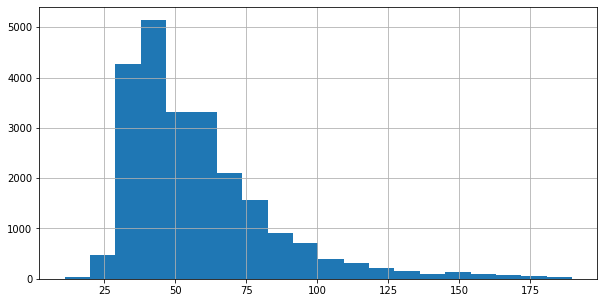

In [42]:
db['total_area'].hist(bins=20,figsize=(10,5),range=(11.111,189.6));

Распределение частот значений общей площади графически совпадает с распределением Пуассона.

**2)** Изучим распределение данных о цене на момент снятия с публикации в исследовании.

In [43]:
last_price_analisis=pd.DataFrame(db['last_price'].describe().apply(lambda x: locale.format_string('%d', x, grouping=True, monetary=True)))
print(last_price_analisis)

        last_price
count       23 699
mean     6 541 548
std     10 887 013
min         12 190
25%      3 400 000
50%      4 650 000
75%      6 800 000
max    763 000 000


Показатели описательной статистики свидетельствуют о наличии выбросов на два порядка превосходящих границу 75%го интервала, стандартное отклонение превосходит среднее значение в 1,5 раза.

In [44]:
print(pd.cut(db['last_price'],bins=np.linspace(10000,800000000,8)).value_counts(sort=False))

(10000.0, 114294285.714]          23662
(114294285.714, 228578571.429]       28
(228578571.429, 342862857.143]        6
(342862857.143, 457147142.857]        2
(457147142.857, 571431428.571]        0
(571431428.571, 685715714.286]        0
(685715714.286, 800000000.0]          1
Name: last_price, dtype: int64


Исключим очевидно нетипичное значение в диапазоне (685715714.286, 800000000.0] рублей и построим гистограмму частот.

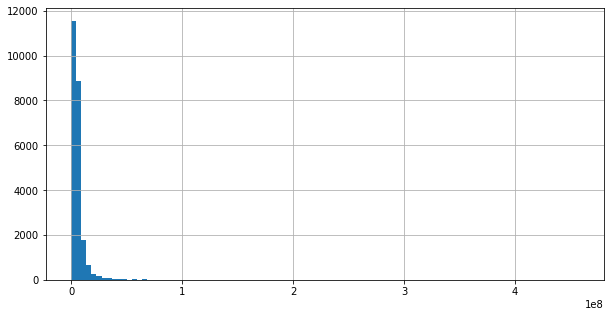

In [45]:
db['last_price'].hist(bins=100,figsize=(10,5), range=(0,457147142.857));

99.84% значений цены расположены в диапазоне (10000.0, 114294285.714] рублей. Построим гистограмму по этому диапазону, чтобы определить тип распределения.

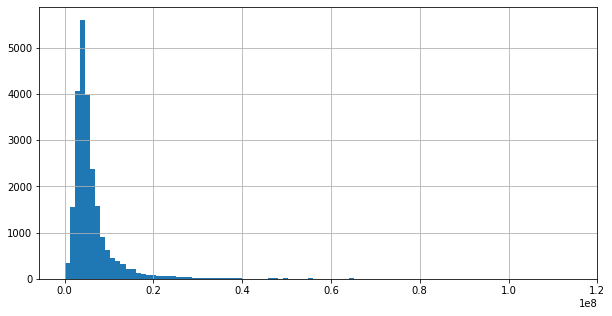

In [46]:
db['last_price'].hist(bins=100,figsize=(10,5), range=(10000.0, 114294285.714));

Распределение частот значений цены графически не полноостью совпадает с распределением Пуассона. Большая часть кваритр имеет стоимость 3-5 млн р.

**3)** Изучим распределение данных о числе комнат объектов в исследовании.

In [47]:
rooms_analisis=pd.DataFrame(db['rooms'].describe().apply(lambda x: format(x, '.0f')))
print(rooms_analisis)

       rooms
count  23699
mean       2
std        1
min        0
25%        1
50%        2
75%        3
max       19


Основной объем записей исходных даных описывает объявления о продаже 1-3 комнатных квартир, Среднее значение совпадает с медианой столбца - типичной является 2х комнатная квартира. 

In [48]:
print(db['rooms'].value_counts())

1     8234
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
0       10
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


В статистике выбиваются из ряда записи с незаполненной информацией о количестве комнат (0) и запись о продаже нетипичного объекта c 19-ю комнатами.

In [49]:
print('Площадь, приходящаяся на одну комнату, в среднем по исследованию:',format(db['total_area'].median()/db['rooms'].median(), '.2f'))
print('Площадь, приходящаяся на одну комнату, для 19ти комнатного объекта:',format(db.query('rooms==@db.rooms.max()')['total_area'].median()/db.query('rooms==@db.rooms.max()')['rooms'].median(), '.2f'))

Площадь, приходящаяся на одну комнату, в среднем по исследованию: 26.00
Площадь, приходящаяся на одну комнату, для 19ти комнатного объекта: 19.72


Можно с уверенностью предположить, что запись о объекте с максимальным количеством комнат не является ошибочной. Однако, для визуализации характера распределения данных о количестве комнат в исследовании, при построении диаграммы частот исключим минимальные и максимальное значчение.

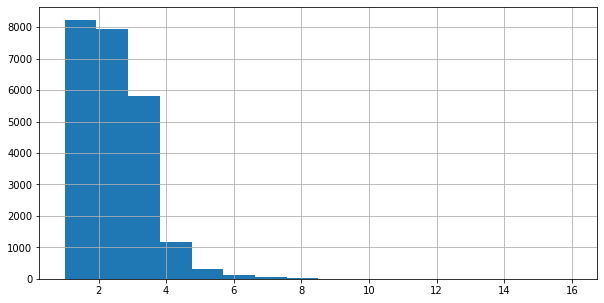

In [50]:
selection=db.query('not((rooms==@db.rooms.max())|(rooms==@db.rooms.min()))')
minimum=selection['rooms'].min()
maximum=selection['rooms'].max()
bins=selection['rooms'].value_counts().shape[0]
selection['rooms'].hist(bins=maximum,range=(minimum,maximum),figsize=(10,5));

Распределение частот значений количества комнат графически совпадает с распределением Пуассона. Наиболее популярные -- 1-комантные и 2-х комнатные квартиры.

**4)** Изучим распределение данных о высоте потолков объектов недвижимости в исследовании (исключая записи с маркерами отсутстующих значений в данном поле).

In [51]:
ceiling_height_exist=db.query('ceiling_height>0')
ceiling_height_analisis=pd.DataFrame(ceiling_height_exist['ceiling_height'].describe().apply(lambda x: format(x, '.2f')))
print(ceiling_height_analisis)

      ceiling_height
count       14477.00
mean            2.73
std             0.30
min             2.00
25%             2.52
50%             2.65
75%             2.80
max            10.30


Типичная высота потолков объектов исследования находится в диапазоне от 2,52м до 2,8м (среднее значение 2,73м +/- 0.3м).

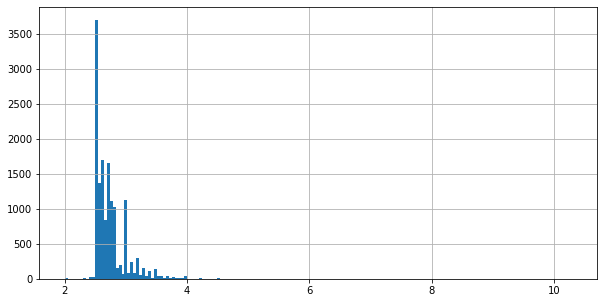

In [52]:
minimum=ceiling_height_exist['ceiling_height'].min()
maximum=ceiling_height_exist['ceiling_height'].max()
bins=ceiling_height_exist['ceiling_height'].value_counts().shape[0]
ceiling_height_exist['ceiling_height'].hist(bins=bins,range=(minimum,maximum),figsize=(10,5));

Построим гистограмму по диапазону типичной высоты потолков (от 2.52м до 2.8м), чтобы определить наиболее часто встречающиеся значения.

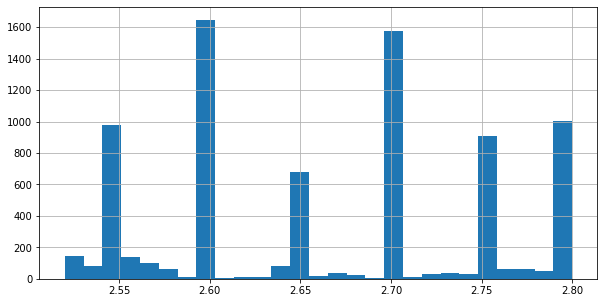

In [53]:
minimum=2.52
maximum=2.8
bins=ceiling_height_exist.query('ceiling_height>@minimum and ceiling_height<@maximum')['ceiling_height'].value_counts().shape[0]
ceiling_height_exist['ceiling_height'].hist(bins=bins,range=(minimum,maximum),figsize=(10,5));

Такими являются [2.55, 2.60, 2.65, 2.70, 2.75, 2.80], высота потолка до 3,5 м соответсвует стандартам ГОСТа. Апостериори, появление остальных значений связано действиями пользователя: с ошибкой измерения, перепланировкой, ремонтом, индивидуальным проектом и т.д. 

#### Изучение времени продажи квартиры.

Построим гистограмму частот длительности периода от размещения объявления до его снятия (исключая записи с отсутствующими значениями).

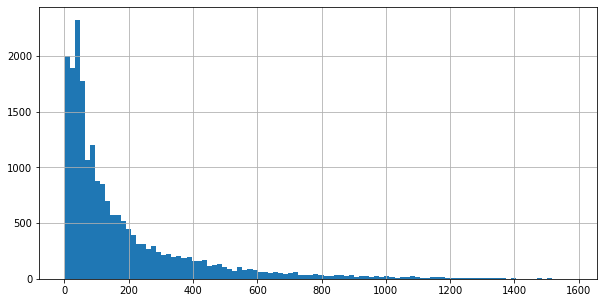

In [54]:
days_exposition_exist=db.query('days_exposition>0')
minimum=days_exposition_exist['days_exposition'].min()
maximum=days_exposition_exist['days_exposition'].max()
bins=100
days_exposition_exist['days_exposition'].hist(bins=bins,range=(minimum,maximum),figsize=(10,5));

Получим основные статистические показатели по выборке.

In [55]:
all_existing_stat=days_exposition_exist['days_exposition'].describe().apply(lambda x: format(x, '.1f'))
print(all_existing_stat)

count    20518.0
mean       180.9
std        219.7
min          1.0
25%         45.0
50%         95.0
75%        232.0
max       1580.0
Name: days_exposition, dtype: object


Медианное время продаж составляет 95 дней с даты размещения объявления, половина объявлений снитается с публикации в период от 45 до 232 дней. Данные о среднем значении и величине стандартного отклонения от него свидетельствует о наличии значительного количества записей с необычно долгими продажами.

Определим границы необчно быстрых и долгих продаж (5% первых и 5 последних в ряду).

In [56]:
print(pd.qcut(days_exposition_exist['days_exposition'], q=20, precision=0))

1          (67.0, 82.0]
2        (460.0, 647.0]
3        (364.0, 460.0]
4        (114.0, 135.0]
5          (48.0, 60.0]
              ...      
23691    (460.0, 647.0]
23692    (364.0, 460.0]
23693    (232.0, 287.0]
23695      (35.0, 45.0]
23697    (460.0, 647.0]
Name: days_exposition, Length: 20518, dtype: category
Categories (20, interval[float64]): [(0.0, 9.0] < (9.0, 17.0] < (17.0, 26.0] < (26.0, 35.0] < ... <
                                     (287.0, 364.0] < (364.0, 460.0] < (460.0, 647.0] <
                                     (647.0, 1580.0]]


Необычно быстрые продажи происходят за период до 9 дней от публикации, а необычно долгие занимают более 647 дней. 15 процентов продаж происходят на второй год после публикации (или, что кажется более правдоподобным, закрываются неактивные объявления).

Построим распределение частот для 15% самых быстрых и 15% самых медленных продаж.

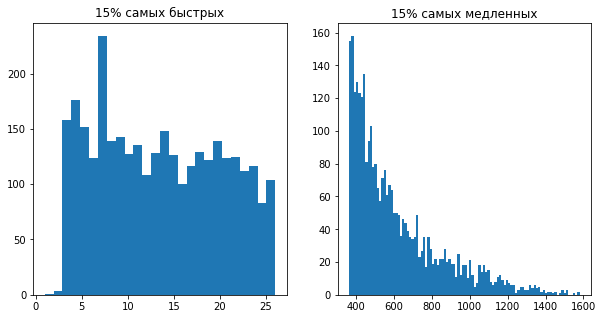

In [57]:
fig, ax = plt_pyp.subplots(nrows=1, ncols=2,figsize=(10,5))
bins=days_exposition_exist.query('days_exposition<=26')['days_exposition'].value_counts().shape[0]
ax[0].title.set_text('15% самых быстрых')
ax[0].hist(days_exposition_exist.query('days_exposition<=26')['days_exposition'],bins=bins);
ax[1].title.set_text('15% самых медленных')
ax[1].hist(days_exposition_exist.query('days_exposition>364')['days_exposition'],bins=100);

Самые быстрые продажи характеризуются плотным распределением частот, в то время как самые медленные, имеющие вид распределения Пуассона, вносят наибольший вклад в искажение средних данных по выборке.

Построим диаграмму распределения времени продаж длительностью до одного года.

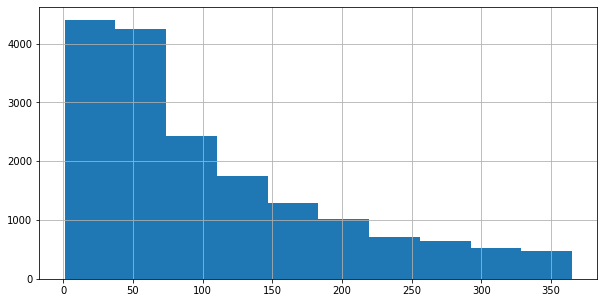

In [58]:
days_exposition_365=days_exposition_exist.query('days_exposition<=365')
minimum=days_exposition_365['days_exposition'].min()
maximum=days_exposition_365['days_exposition'].max()
bins=10
days_exposition_365['days_exposition'].hist(bins=bins,range=(minimum,maximum),figsize=(10,5));

Сравним статистические показатели выборки всех известных значений количества дней размещения объявлений и выборки, уменьшенной до значений не превышающих 1 года.

In [59]:
stat_365=days_exposition_365['days_exposition'].describe().apply(lambda x: format(x, '.1f'))
stat_365=pd.DataFrame(stat_365)
stat_365.columns=['days_exposition_365']
all_stat=pd.DataFrame(all_existing_stat)
print(all_stat.join(stat_365))

      days_exposition days_exposition_365
count         20518.0             17474.0
mean            180.9               105.0
std             219.7                89.8
min               1.0                 1.0
25%              45.0                37.0
50%              95.0                74.0
75%             232.0               154.0
max            1580.0               365.0


В 85%-й выборке самых быстрых продаж среднее значение приблизилось к медианному, а стандартное отклонение больше его не превышает. Построим диаграммы размаха для выборки всех известных значений количества дней размещения объявлений и выборки, уменьшенной до значений не превышающих 365 дней.

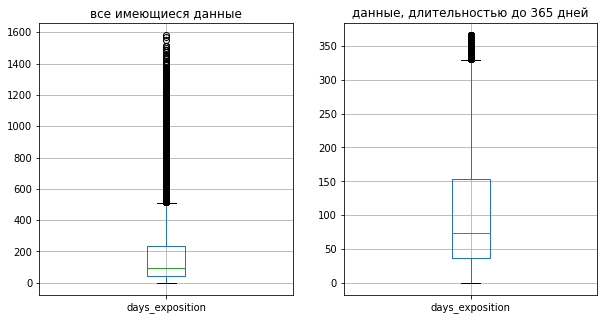

In [60]:
fig, axes = plt_pyp.subplots(nrows=1, ncols=2,figsize=(10,5))
axes[0].title.set_text('все имеющиеся данные')
days_exposition_exist.boxplot(['days_exposition'], ax=axes[0]);

axes[1].title.set_text('данные, длительностью до 365 дней')
days_exposition_365.boxplot(['days_exposition'], ax=axes[1]);
plt_pyp.show()

В 85%-й выборке самых быстрых продаж все еще присутствует значительное количество выбросов в правой части ряда. Выбросы практичест исчезают в 80%-й выборке:

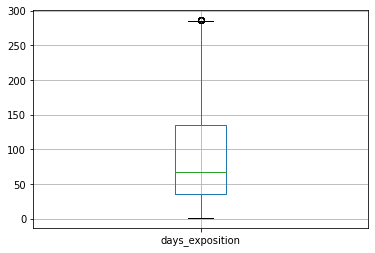

In [61]:
days_exposition_exist.query('days_exposition<287').boxplot(['days_exposition']);

Получим статистическое описание для выборки времени продажи от 1 до 287 дней.

In [62]:
days_exposition_287=days_exposition_exist.query('days_exposition<=287')
print(days_exposition_287['days_exposition'].describe().apply(lambda x: format(x, '.1f')))

count    16416.0
mean        90.8
std         72.3
min          1.0
25%         35.0
50%         67.0
75%        135.0
max        287.0
Name: days_exposition, dtype: object


Уменьшение выборки до 80%-го интервала ухудшило показатели статистики (отношение стандартного отклонения к среднему значению увеличилось). А значит сокращение выборки всех известных значений количества дней размещения объявлений до 80% было неоправданным, и действительное среднее значение времени продажи лежит в диапазоне [74:105] дней.

#### Влияние различных факторов на стоимость квартиры

**1)** Влияние площади на стоимость квартиры

Рассчитаем коэффициент корреляции между ценой продажи квартиры и ее площадью.

In [63]:
print(db['last_price'].corr(db['total_area']))
print(np.cov(db['last_price'],db['total_area']))

0.6536750579657242
[[1.18527058e+14 2.53734742e+08]
 [2.53734742e+08 1.27121363e+03]]


Значение коэффициента корреляции позволяет сделать вывод о наличии взаимосвязи цены квартиры и ее площади. Однако его величина показывает, что влияние фактора размера общей площади не является определяющим.

**2)** Влияние количества комнат на стоимость квартиры

Рассчитаем коэффициент корреляции между ценой продажи квартиры и количеством комнат.

In [64]:
print(db['last_price'].corr(db['rooms']))
print(np.cov(db['last_price'],db['rooms']))

0.36474617272031684
[[1.18527058e+14 4.23634248e+06]
 [4.23634248e+06 1.13810710e+00]]


Значение коэффициента корреляции (менее 0.5) позволяет сделать вывод о том, что взаимосвязь стоимости квартиры и количества комнат не очевидна и должна рассматриваться в комплексе факторов.

**3)** Влияние удаленности квартиры от центра на ее стоимость

In [65]:
print(db['last_price'].corr(db['cityCenters_nearest']))
print(np.cov(db['last_price'],db['cityCenters_nearest']))

-0.05095199334276184
[[ 1.18527058e+14 -5.34461098e+09]
 [-5.34461098e+09  9.28308519e+07]]


Значение коэффициента корреляции близкое к 0 в анализируемых данных позволяет заключить, что взаимосвязь стоимости квартиры и ее удаленности от центра отсутствует.

**4)** Влияние стоимости квартиры от ее расположения в этажности дома.

Для анализа зависимости стоимости квартиры от того, на каком этаже расположена квартира: первом, последнем или другом, применим Anova Test для определения наличия статистически значимой взаимосвязи. Рассчитаем уровень значимости (коэффициент р) гипотезы о том, что стоимость квартиры не зависит от ее расположения в этажности дома.

In [66]:
model = ols('last_price~floor_type', data = db).fit()
result_anova = sm.stats.anova_lm(model)
print('Коэффициент р равен: ', result_anova.loc['floor_type','PR(>F)'])

Коэффициент р равен:  1.4158007183811627e-21


Так как значение P составляет менее 0.05, предполагаем, что существует значительные различия в среднем групп, образованных каждым уровнем типа этажа. Следовательно, делаем вывод о существовании зависимости цены квартиры от того, на каком этаже она расположена. 

In [67]:
pivot_floor_type=db.pivot_table(index='floor_type', values='price_per_sqmeter')
pd.options.display.float_format = '{:.2f} руб.'.format
print(pivot_floor_type)

            price_per_sqmeter
floor_type                   
first           81983.56 руб.
last            93749.37 руб.
other          103468.22 руб.


Можно сделать вывод о том, что средняя стоимость квадратного метра квартир, находящихся на этажах отличных от первого и последнего, соответственно на 20,8% и 9,4% выше.

**5)** Зависимость стоимости квартиры от дня недели публикации объявления.

Так как день недели тоже является категориальной переменной, для анализа зависимости стоимости квартиры так же применим метод наименьших квадратов для определения наличия статистически значимой взаимосвязи. Рассчитаем уровень значимости гипотезы о том, что стоимость квартиры не зависит от дня недели публикации объявления.

In [68]:
model = ols('last_price~weekday_published', data = db).fit()
result_anova = sm.stats.anova_lm(model)
print('Коэффициент р равен: ', result_anova.loc['weekday_published','PR(>F)'])

Коэффициент р равен:  0.28805783557605447


Так как значение P составляет более 0.05, предполагаем, что не существует значительных различий в среднем групп, образованных каждым уровнем дня недели публикации объявления. Следовательно, подтверждаем вывод об отсутствии зависимости цены квартиры от дня недели публикации объявления. Данное заключение согласуется с априори выводом, что, если время от даты публикации до даты снятия объявления находится в интервале 2.5-3.5 месяцев, не должно быть прямой зависимости между днем недели размещения и стоимостью квартиры.

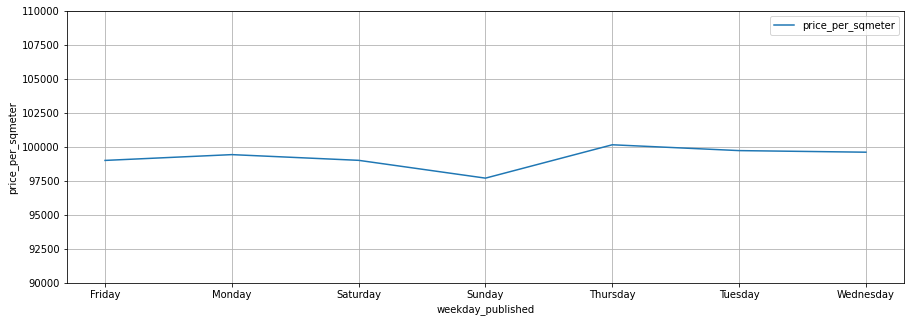

In [69]:
pivot_weekday_published=db.pivot_table(index='weekday_published', values='price_per_sqmeter')
pivot_weekday_published.plot(grid=True, figsize=(15,5),ylim=(90000,110000), ylabel='price_per_sqmeter');

Форма графика зависимости средней стоимости квадратного метра квартиры от дня недели публикации приближается к прямой линии без ярко выраженного наклона к оси х. Это подтверждает вышеприведенный вывод.

**6)** Взаимосвязь стоимости квартиры и месяца публикации объявления.

Для анализа зависимости стоимости квартиры от месяца публикации применим Anova Test для определения наличия статистически значимой взаимосвязи. Рассчитаем уровень значимости гипотезы о том, что стоимость квартиры не зависит от месяца публикации объявления.

In [70]:
model = ols('last_price~month_published', data = db).fit()
result_anova = sm.stats.anova_lm(model)
print('Коэффициент р равен: ', result_anova.loc['month_published','PR(>F)'])

Коэффициент р равен:  0.5690795172121447


Так как значение P составляет более 0.05, предполагаем, что не существует значительных различий в среднем групп, образованных каждым уровнем месяца публикации объявления. Следовательно, делаем вывод об отсутствии зависимости цены квартиры от месяца публикации объявления.

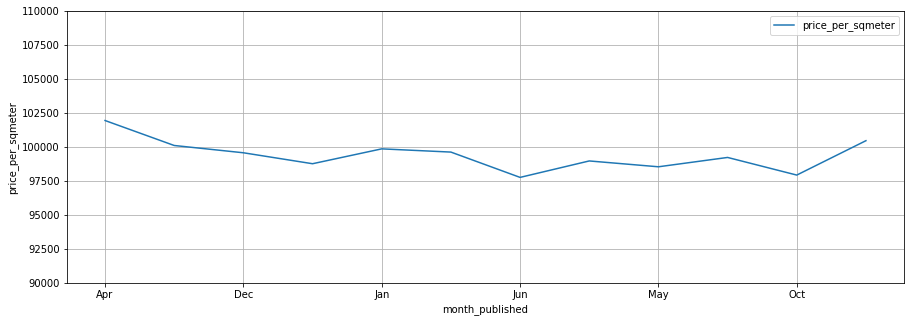

In [71]:
pivot_month_published=db.pivot_table(index='month_published', values='price_per_sqmeter')
pivot_month_published.plot(grid=True, figsize=(15,5),ylim=(90000,110000), ylabel='price_per_sqmeter');

Форма графика зависимости средней стоимости квадратного метра квартиры от месяца публикации приближается к прямой линии без ярко выраженного наклона к оси х. Это свидетельствует о том, что зависимость стоимости жилья от временного фактора следует рассматривать в комплексе, например от связки месяц-год публикации.

**7)** Зависимость стоимости квартиры от года публикации объявления.

Для анализа зависимости стоимости квартиры от года публикации рассчитаем коэффициент значимости р по методу наименьших квадратов (Anova Test). Он продемострирует уровень значимости гипотезы о том, что стоимость квартиры не зависит от года публикации объявления.

In [72]:
model = ols('last_price~year_published', data = db).fit()
result_anova = sm.stats.anova_lm(model)
print('Коэффициент р равен: ', result_anova.loc['year_published','PR(>F)'])

Коэффициент р равен:  3.2216805249645355e-11


Так как значение P составляет значительно меньше порогового значения 0.05, предполагаем, что существует значительные различия в среднем групп, образованных каждым уровнем года публикации объявления. Это согласуется с известным утверждением, что стоимость недвижимости, находящаяся под влиянием макроэкономических факторов, зависит от фактора времени.

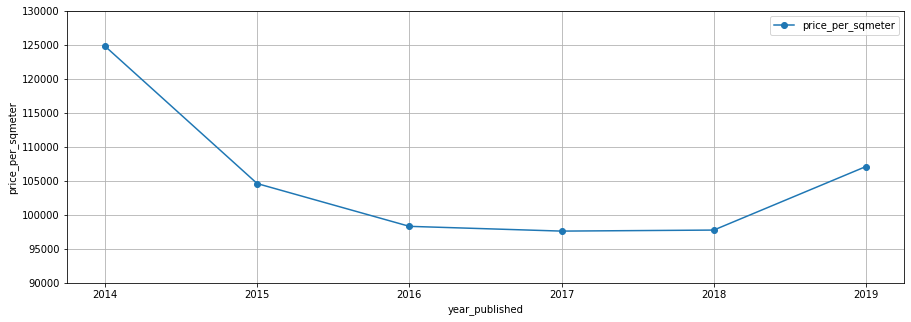

In [73]:
pivot_year_published=db.pivot_table(index='year_published', values='price_per_sqmeter')
pivot_year_published.plot(grid=True, figsize=(15,5),ylim=(90000,130000),style="o-", ylabel='price_per_sqmeter');

На графике зависимости средней стоимости квадратного метра жилья от года публикации объявления прослеживается ее зависимость от макроэкономической ситуации и кризисных явлений в экономике.

#### Анализ населённых пунктов с наибольшим числом объявлений.

Определим 10 населённых пунктов с наибольшим числом объявлений.

In [74]:
top_10_locations_name = list(db.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10).index)
print(top_10_locations_name)

['Санкт-Петербург', 'поселок Мурино', 'поселок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'поселок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']


Исключим из исследования объявления содержащие абсолютно нетипичные данные: квартира с общей стоимостью кратно ниже стоимости квадратного метра и объект недвижимости максимальной стоимости, превышающей предыдущую в упорядоченом ряду почти в 2 раза .

In [75]:
min_last_price=db['last_price'].min()
min_last_price_loc=list(db.query('last_price==@min_last_price')['locality_name'])
print('Наименьшая стоимость квартиры {} руб. зафиксирована в {}'.format(min_last_price,min_last_price_loc[0]))
max_last_price=db['last_price'].max()
max_last_price_loc=list(db.query('last_price==@max_last_price')['locality_name'])
print('Наибольшая стоимость квартиры {} руб. зафиксирована в {}'.format(max_last_price,max_last_price_loc[0]))

Наименьшая стоимость квартиры 12190.0 руб. зафиксирована в Санкт-Петербург
Наибольшая стоимость квартиры 763000000.0 руб. зафиксирована в Санкт-Петербург


Получим информацию о максимальной и минимальной стоимости жилья, а так же о  средней стоимости одного квадатного метра для 10 населённых пунктов с наибольшим числом объявлений.

In [76]:
top_10_locations=db.query('locality_name in @top_10_locations_name and last_price > @min_last_price and last_price < @max_last_price')
top_10_locations_pivot=top_10_locations.pivot_table(index='locality_name',aggfunc={'last_price':['count',min,max],'price_per_sqmeter':'mean'})
top_10_locations_pivot.columns=['publications_count','last_price_max','last_price_min','price_per_sqmeter_mean']
top_10_locations_pivot.sort_values(by='publications_count',ascending=False)

,publications_count,last_price_max,last_price_min,price_per_sqmeter_mean
locality_name,,,,
Санкт-Петербург,15719,420000000.00 руб.,1190000.00 руб.,114742.26 руб.
поселок Мурино,556,8500000.00 руб.,1730000.00 руб.,85681.76 руб.
поселок Шушары,440,10990000.00 руб.,1500000.00 руб.,78677.36 руб.
Всеволожск,398,24412900.00 руб.,965780.00 руб.,68654.47 руб.
Пушкин,369,42000000.00 руб.,1990000.00 руб.,103125.82 руб.
Колпино,338,36900000.00 руб.,2100000.00 руб.,75424.58 руб.
поселок Парголово,327,9140000.00 руб.,1400000.00 руб.,90175.91 руб.
Гатчина,307,13900000.00 руб.,850000.00 руб.,68746.15 руб.
деревня Кудрово,299,13000000.00 руб.,1800000.00 руб.,92473.55 руб.


Определим населенные пункты из ТОП10 в которых зафиксирована самая высокая и самая низкая стоимость жилья.

In [77]:
print('Населенный пункт с самой высокой стоимостью жилья:',list(top_10_locations_pivot.query('last_price_max==last_price_max.max()').index)[0])
print('Населенный пункт с самой низкой стоимостью жилья:',list(top_10_locations_pivot.query('last_price_min==last_price_min.min()').index)[0])

Населенный пункт с самой высокой стоимостью жилья: Санкт-Петербург
Населенный пункт с самой низкой стоимостью жилья: Выборг


#### Анализ квартир в Санкт-Петербурге

Изучим предложения квартир в Санкт-Петербурге. Создадим выборку объявлений в Санкт-Петербурге, у которых известно расстояние до центра города, и расчитаем удаленность в километрах.

In [78]:
whole_SPB = top_10_locations.query('locality_name=="Санкт-Петербург" and cityCenters_nearest>0')
whole_SPB['cityCenters_nearest_km']=(whole_SPB['cityCenters_nearest']/1000).round(0).astype('int')

Чтобы определить радиус центральной зоны города, построим график зависимости цены за квадратный метр от удаленности от центра.

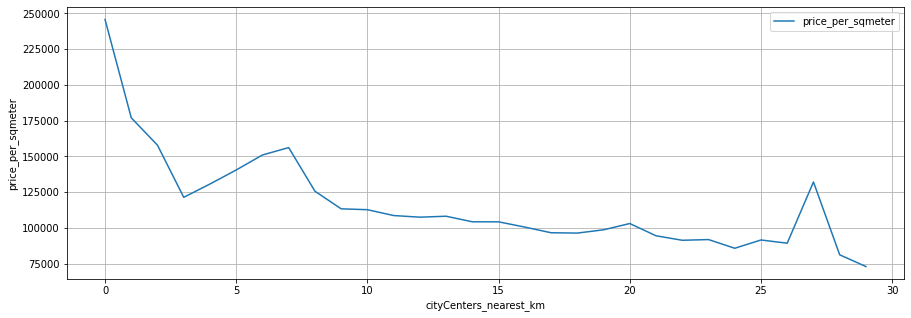

In [79]:
whole_SPB_pivot=whole_SPB.pivot_table(index='cityCenters_nearest_km',values='price_per_sqmeter')
whole_SPB_pivot.plot(grid=True, figsize=(15,5), ylabel='price_per_sqmeter');

Излом на графике на отметке 3х километров свидетельствует о неоднородности стоимости кв.м. в центральной зоне. Однако граница центральной зоны пролегает в районе 7-8 км: после этой отметки наблюдается устойчивый понижающийся тренд.

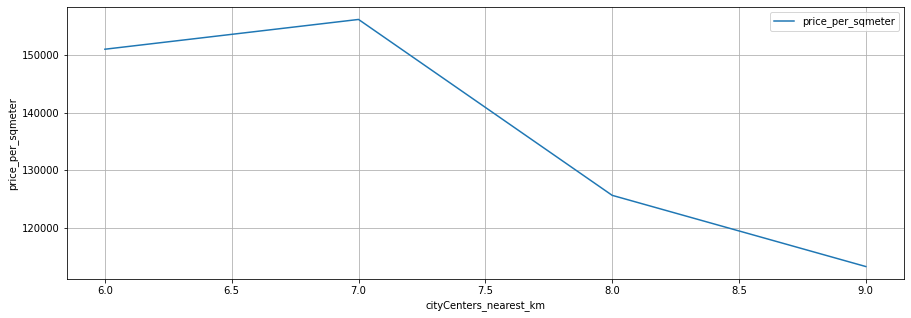

In [80]:
whole_SPB_pivot.query('index>5 and index<10').plot(grid=True, figsize=(15,5), ylabel='price_per_sqmeter');

Граница центральной зоны пролегает на отметке 7 км.

#### Анализ сегмента квартир в центре.

Создадим выборку объектов недвижимости, предлагаемой для продажи в центре г. Санкт-Петербурга.

In [81]:
center_SPB=whole_SPB.query('cityCenters_nearest_km<=7')

Проанализируем данные об общей площади для всего города и объектов в центре.

In [82]:
whole_SPB_total_area=pd.DataFrame(whole_SPB['total_area'].describe().apply(lambda x: format(x, '.1f')))
center_SPB_total_area=pd.DataFrame(center_SPB['total_area'].describe().apply(lambda x: format(x, '.1f')))
center_SPB_total_area.columns=['center_SPB']
print(whole_SPB_total_area.join(center_SPB_total_area))

      total_area center_SPB
count    15658.0     3524.0
mean        64.6       93.1
std         40.1       59.3
min         12.0       12.0
25%         42.0       57.0
50%         55.0       78.7
75%         74.5      110.0
max        900.0      631.2


Квартиры, предлагаемые в центре Санкт-Питербурга в среднем больше по площади, чем в объявлениях по всему городу.

Так же квартиры, предлагаемые в центре Санкт-Питербурга дороже, чем  в среднем по городу:

In [83]:
whole_SPB_last_price=pd.DataFrame(whole_SPB['last_price'].describe().apply(lambda x: format(x, '.1f')))
center_SPB_last_price=pd.DataFrame(center_SPB['last_price'].describe().apply(lambda x: format(x, '.1f')))
center_SPB_last_price.columns=['center_SPB']
print(whole_SPB_last_price.join(center_SPB_last_price))

        last_price   center_SPB
count      15658.0       3524.0
mean     7985079.2   14683241.0
std     11481797.4   20803138.8
min      1190000.0    1600000.0
25%      4200000.0    6682500.0
50%      5500000.0    9200000.0
75%      8124250.0   14500000.0
max    420000000.0  401300000.0


Логично, что большие по площади, чем в среднем по городу, объекты в центре имеют и большее количество комнат. Предлагаются, в основном, 3х-комнатные квартиры.

In [84]:
whole_SPB_rooms=pd.DataFrame(whole_SPB['rooms'].describe().apply(lambda x: format(x, '.1f')))
center_SPB_rooms=pd.DataFrame(center_SPB['rooms'].describe().apply(lambda x: format(x, '.1f')))
center_SPB_rooms.columns=['center_SPB']
print(whole_SPB_rooms.join(center_SPB_rooms))

         rooms center_SPB
count  15658.0     3524.0
mean       2.2        2.8
std        1.1        1.4
min        0.0        0.0
25%        1.0        2.0
50%        2.0        3.0
75%        3.0        3.0
max       19.0       19.0


Проанализируем высоту потолков для квартир в центре (для которых она известна).

In [85]:
whole_SPB_ceiling_height=pd.DataFrame(whole_SPB.query('ceiling_height>0')['ceiling_height'].describe().apply(lambda x: format(x, '.1f')))
center_SPB_ceiling_height=pd.DataFrame(center_SPB.query('ceiling_height>0')['ceiling_height'].describe().apply(lambda x: format(x, '.1f')))
center_SPB_ceiling_height.columns=['center_SPB']
print(whole_SPB_ceiling_height.join(center_SPB_ceiling_height))

      ceiling_height center_SPB
count        10056.0     2284.0
mean             2.8        3.1
std              0.3        0.4
min              2.0        2.4
25%              2.5        2.8
50%              2.7        3.0
75%              2.9        3.3
max             10.3        6.0


Высота потолков в квартирах цетрального района Санкт-Петербурга существенно превышает этот показатель в данных по всему городу. Возможно, в результате влияния года постройки домов в центре.

Проанализируем влияние на стоимость квартир количества комнат:

In [86]:
print('Коэффициент корреляции Пирсона для всего города равен: ', whole_SPB['last_price'].corr(whole_SPB['rooms']))
print('Коэффициент корреляции Пирсона для центра равен: ',  center_SPB['last_price'].corr(center_SPB['rooms']))

Коэффициент корреляции Пирсона для всего города равен:  0.40298103533169627
Коэффициент корреляции Пирсона для центра равен:  0.339266549250565


Значения коэффициента корреляции свидетельствуют о наличии определенного взаимного влияния факторов. В среднем по городу данные демонстрируют более устойчивую взаимосвязь стоимости квартир и количества комнат.

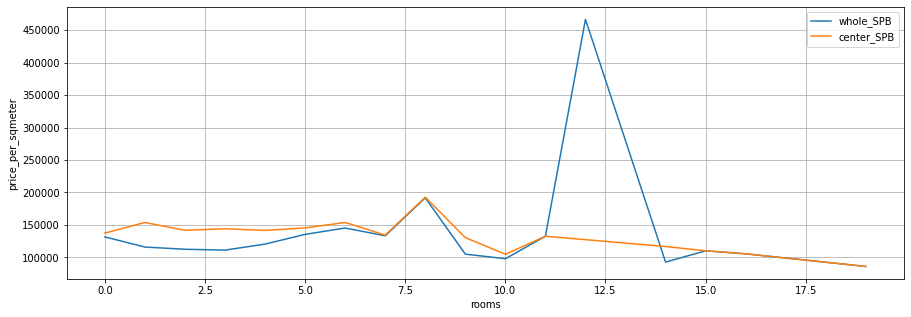

In [87]:
ax1=whole_SPB.pivot_table(index='rooms',values='price_per_sqmeter').rename({'price_per_sqmeter':'whole_SPB'},axis=1).plot(grid=True, figsize=(15,5), ylabel='price_per_sqmeter');
center_SPB.pivot_table(index='rooms',values='price_per_sqmeter').rename({'price_per_sqmeter':'center_SPB'},axis=1).plot(grid=True, figsize=(15,5),ax=ax1,label='center_SPB');

Исключая аномальный всплеск в данных по городу для 12-ти комнатных объектов, средняя стоимость квадратного метра для обеих выборок демонстрируют небольшой понижающийся тренд в правую сторону.

Проанализируем зависимость стоимости квартир от этажа расположения:

In [88]:
print('Коэффициент корреляции Пирсона для всего города равен: ', whole_SPB['last_price'].corr(whole_SPB['floor']))
print('Коэффициент корреляции Пирсона для центра равен: ',  center_SPB['last_price'].corr(center_SPB['floor']))

Коэффициент корреляции Пирсона для всего города равен:  -0.00342670064734797
Коэффициент корреляции Пирсона для центра равен:  0.10697243595364522


Низкие значения коэффициента корреляции свидетельствуют об отсутствии взаимного влияния факторов. Хотя примечательно их соотношение для квартир в центре и в среднем по городу.

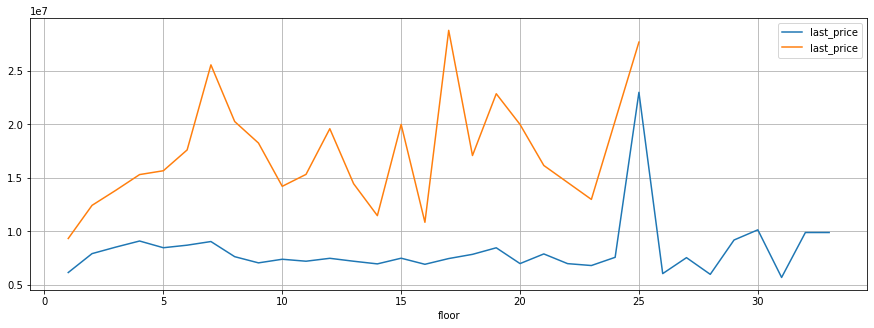

In [89]:
ax1=whole_SPB.pivot_table(index='floor',values='last_price').rename({'price_per_sqmeter':'whole_SPB'},axis=1).plot(grid=True, figsize=(15,5));
center_SPB.pivot_table(index='floor',values='last_price').rename({'price_per_sqmeter':'center_SPB'},axis=1).plot(grid=True, figsize=(15,5),ax=ax1);

Характер графика зависимости стоимости квартиры от этажа показывает бОльшую взаимосвязь для объектов в центре города.

Проанализируем зависимость стоимости квартир от удаленности от центра:

In [90]:
print('Коэффициент корреляции Пирсона для всего города равен: ', whole_SPB['last_price'].corr(whole_SPB['cityCenters_nearest']))
print('Коэффициент корреляции Пирсона для центра равен: ',  center_SPB['last_price'].corr(center_SPB['cityCenters_nearest']))

Коэффициент корреляции Пирсона для всего города равен:  -0.2865779906683176
Коэффициент корреляции Пирсона для центра равен:  -0.04580980621110353


Значение коэффициента корреляции свидетельствуют об отсутствии взаимного влияния факторов для центра города. 
Для квартир в среднем по городу есть некоторая взаимосвязь уменьшения цены с удалением от центра.

Для анализа зависимости стоимости квартиры в Санкт-Петербурге от даты размещения объявления создадим колонку "Месяц и год размещения объявления".

In [91]:
whole_SPB['month_year']=whole_SPB['month_published']+" "+whole_SPB['year_published'].astype(str)
center_SPB['month_year']=center_SPB['month_published']+" "+center_SPB['year_published'].astype(str)

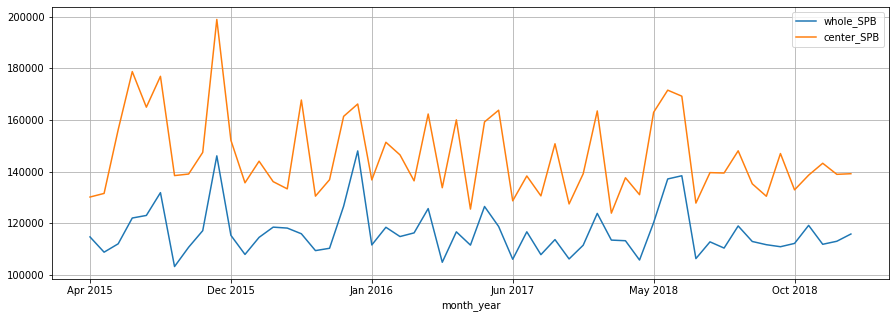

In [92]:
ax1=whole_SPB.pivot_table(index='month_year',values='price_per_sqmeter').rename({'price_per_sqmeter':'whole_SPB'},axis=1).plot(grid=True, figsize=(15,5));
center_SPB.pivot_table(index='month_year',values='price_per_sqmeter').rename({'price_per_sqmeter':'center_SPB'},axis=1).plot(grid=True, figsize=(15,5),ax=ax1);

Графики зависимости средней стоимости квадратного метра квартир от даты размещения (месяца и года) не демонстрируют ярко выраженной зависимости.  

Для подтверждения зависимости стоимости квартиры от даты публикации для г. Санкт-Петербурга рассчитаем коэффициент значимости р по методу наименьших квадратов (Anova Test). Он продемострирует уровень значимости гипотезы о том, что стоимость квартиры не зависит от даты публикации объявления.

In [93]:
model = ols('last_price~month_year', data = whole_SPB).fit()
result_anova = sm.stats.anova_lm(model)
print('Коэффициент р для всего города равен: ', result_anova.loc['month_year','PR(>F)'])
model = ols('last_price~month_year', data = center_SPB).fit()
result_anova = sm.stats.anova_lm(model)
print('Коэффициент р для центра города равен: ', result_anova.loc['month_year','PR(>F)'])

Коэффициент р для всего города равен:  2.9954018777419853e-18
Коэффициент р для центра города равен:  0.0003595926439794654


Так как значение P составляет значительно меньше порогового значения 0.05, предполагаем, что существует значительные различия в среднем групп, образованных каждым уровнем месяца+года публикации объявления. 

## **Общий вывод**

В представленном анализе по представленным данным изучен рынок недвижимости Санкт-Петербурга и области. Изучены следующие параметры: площадь, цена, число комнат, высота потолков. Средним объектом является: 2х комнатная квартира в 52-60 кв.м., высотой потолков 2.65-2,73 м, стоимостью 4,65-6,54 млн. рублей.

Определено, что объекты из исследования в среднем продаются за 74-105 дней от даты размещения. 15% объявлений завершаются до истечения первого месяца.

Выявлена взаимосвязь стоимости и площади квартиры, а так же стоимости квартиры и того, на каком этаже она расположена: первом, последнем или другом. Существует определенная, априори предполагаемая взаимосвязь, стоимости квартиры и количества комнат в ней.

Зависимость стоимости квартиры от временного фактора прослеживается только для года размещения оъявления. День недели и месяц сам по себе не оказывают взаимного влияния на стоимсть жилья.

Сформирована выборка 10 населённых пунктов с наибольшим числом объявлений. На долю Санкт-Петербурга приходится более 66% всего количества объявлений. Среди ТОР10 населённых пунктов самая высокая стоимость жилья зафиксирована в Санкт-Петербурге, а самая низкая - в Выборге.

Определен радиус центральной зоны Санкт-Петербурга, он равен 7 км.

На основе анализа выборки данных по Санкт петербургу выявлено, что из центрального района поступают предложения более дорогих квартир, с большей площадью (и количеством комнат) и высотой потолков. Стоимость квартир в центре чувствительна к этажу расположения и не демонстрирует связи с удалением от географического центра в пределах 7ми километровой зоны. В целом же по городу с увеличением растояния от центра стоимость квартир снижается. 